In [1]:
import arviz as az
from ipywidgets import interact
import ipywidgets as ipyw
import matplotlib.pyplot as plt
import numpy as np
import preliz as pz

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
az.style.use('arviz-doc')

#### 1)
El estadístico Bruno de Finetti declaró que “Las probabilidades no existen”. Cómo se vincula este enunciado con el modelo BetaBinomial que hemos visto?

Al decir que las probabilidades no existen, de Finetti se refiere a a que las probabilidades no son una propiedad de la realidad fija sino una medida de la creencia de un individuo sobre un evento futuro, y esta medida se puede actualizar en el tiempo.  

En el modelo Beta-Binomial podemos ver que la distribución Beta  representa nuestra creencia previa (_prior_) que se actualiza al incorporar los datos observados. El resutado es la distribución _posterior_ que refleja nuestra nueva creencia.

#### 2)
Edwin Jaynes, físico, declaró que la teoría de probabilidad es la lógica de la ciencia. Discutí este enunciado.

La lógica asigna verdades absolutas (Verdadero o Falso) a afirmaciones, la probabilidad hace algo similar asignando un grado de creencia (probabilidad).

#### 3)
Usá `pz.Beta().plot_interactive()` para explorar distintas combinaciones de parámetros de la distribución Beta.  
Cuál es el efecto de los parámetros $\alpha$ y $\beta$ ?

In [3]:
pz.Beta(2, 2).plot_interactive(xy_lim=(None, None, 0, 7))

interactive(children=(FloatSlider(value=2.0, description='alpha (0, inf)', max=12.0, min=2.220446049250313e-16…

Cuando $\alpha$ se hace mayor a $\beta$ la masa de la distribución se acerca al 1, mientras que cuando $\beta$ es mayor se acerca al 0. Si son iguales la distribución queda en 0.5, a mayores valores para los parametros más alto es el pico de la distribución.  
Cuando ambos parametros son menores a 1 los valores más probables pasan a ser los extremos, 0 y 1.

#### 4)
Interpretá los parámetros de una distribución Beta, $\alpha$ y $\beta$ en términos de su PDF (probability density function)  
Analizá solo el caso de $\alpha >= 1$ y $\beta >= 1$

#### 5)
La media de la distribución Beta es $\frac{\alpha}{\alpha + \beta}$. Cuál es la media de la distribución a posteriori para un modelo Beta-Binomial, con prior Beta(2, 5) y 10 experimentos con 6 caras?

La distribucipon _a posteriori_ de un modelo Beta-Binomial es siempre una Beta tal que:  

$$
p(\theta \mid \mathbf{Y}) = \operatorname{Beta}(\alpha=\alpha_{prior} + y , \quad \beta= \beta_{prior} + N - y)
$$

por lo tanto la media sería:  

$$
\mu = \frac{\alpha_{prior} + y}{\alpha_{prior} + y + \beta_{prior} + N - y}

In [5]:
mean = pz.Beta(2 + 6, 5 + 10 - 6).mean()
mean_analitico = (2 + 6) / (2 + 6 + 5 + 10 - 6)

print("Media: ", mean)
print("Media analitica: ", mean_analitico)

Media:  0.47058823529411764
Media analitica:  0.47058823529411764


#### 6)
La varianza de la distribución Beta es $\frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$. Cuál es la varianza de la distribución a posteriori para un modelo Beta-Binomial, con prior Beta(2, 5) y 10 experimentos con 6 caras?

Siguiendo la misma lógica que en el punto anterior...

var = $\frac{(\alpha_{prior} + y) (\beta_{prior} + N - y)}{(\alpha_{prior} + y + \beta_{prior} + N - y)^2(\alpha_{prior} + y + \beta_{prior} + N - y + 1)}$

In [6]:
var = pz.Beta(2 + 6, 5 + 10 - 6).var()
var_analitico = (2 + 6) * (5 + 10 - 6) / ((2 + 6 + 5 + 10 - 6)**2 * (2 + 6 + 5 + 10 - 6 + 1))
print("Varianza: ", var)
print("Varianza analitica: ", var_analitico)

Varianza:  0.01384083044982699
Varianza analitica:  0.01384083044982699


#### 7)
Contrastá los resultados de los puntos anteriores usando la función mean y var de la distribución Beta de PreliZ.

Los resultados son exactamente iguales.

#### 8)
PreliZ tiene una función llamada maxent. Explicá que hace.

Recibe una distribucion (_distribution_), un los extremos de intervalo (_lower, upper_) y un porcentaje de masa (_mass_).  
Devuelve la distribución de máxima entropía de la forma _distribution_ cuyo _mass_ porciento de la masa esta entre _lower_ y _upper_.  
Esto es ideal para encontrar _priors_ ya que máxima entropía es equivalente a la dsitribución menos informativa.

#### 9)
Conocimiento experto indica que un parámetro debe ser positivo y que el 90% puede estar entre 2 y 20. Usá maxent para definir ese prior.

(<Axes: >,
  message: Optimization terminated successfully
  success: True
   status: 0
      fun: -3.120840565524796
        x: [ 3.334e+00  2.990e-01]
      nit: 9
      jac: [-1.846e-01  3.345e+00]
     nfev: 29
     njev: 9)

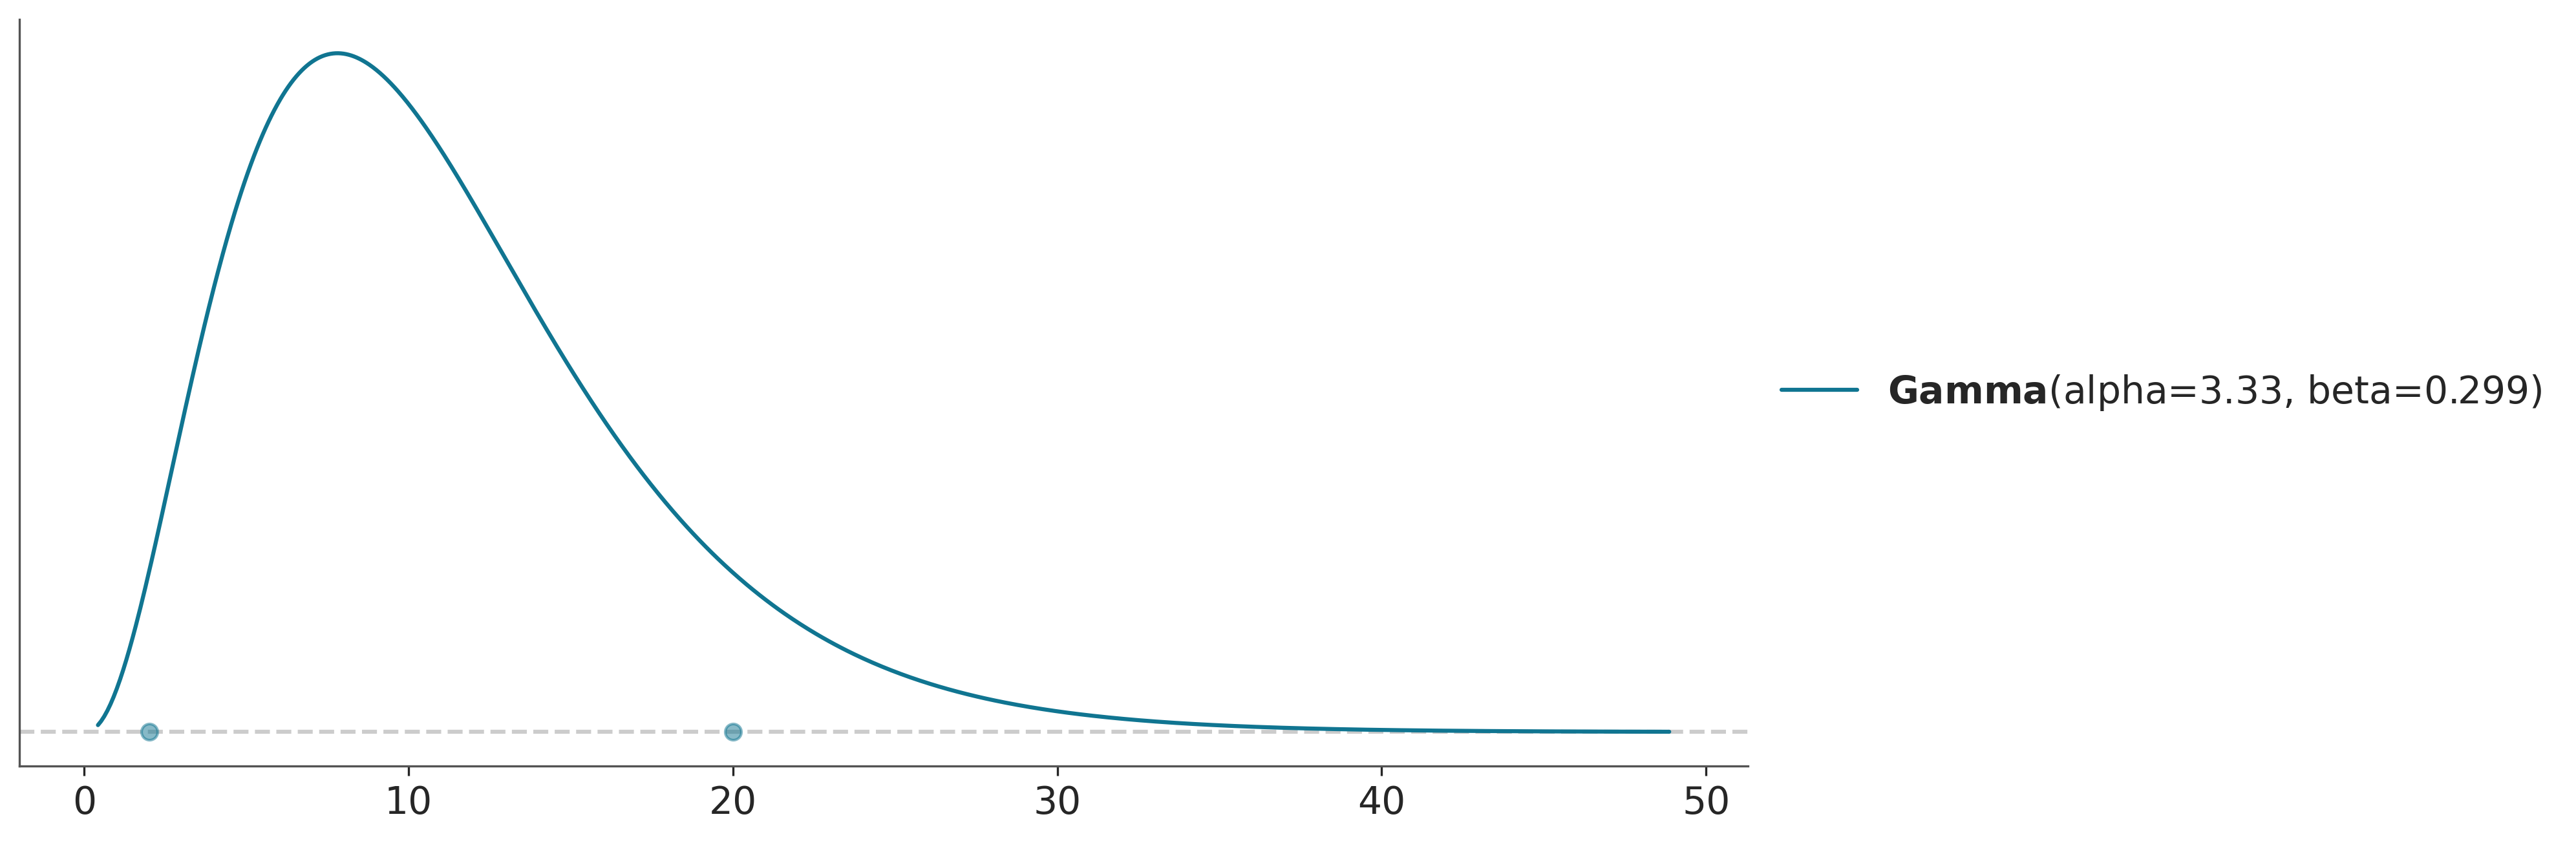

In [7]:
pz.maxent(pz.Gamma(), lower=2, upper=20, mass=0.9)

#### 10)
Conocimiento experto indica que un parámetro debe ser positivo con media 6 y 90% puede estar entre 2 y 20. Usá maxent para definir ese prior.

 The requested mass is 0.9, but the computed one is 0.999
c:\Users\nazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\preliz\distributions\wald.py:187: RuntimeWarning: invalid value encountered in scalar power
  u = (lam / (x + eps)) ** 0.5


(<Axes: >,
  message: Iteration limit reached
  success: False
   status: 9
      fun: -2.050490795365152
        x: [ 5.181e+01]
      nit: 100
      jac: [ 8.141e-03]
     nfev: 1190
     njev: 100)

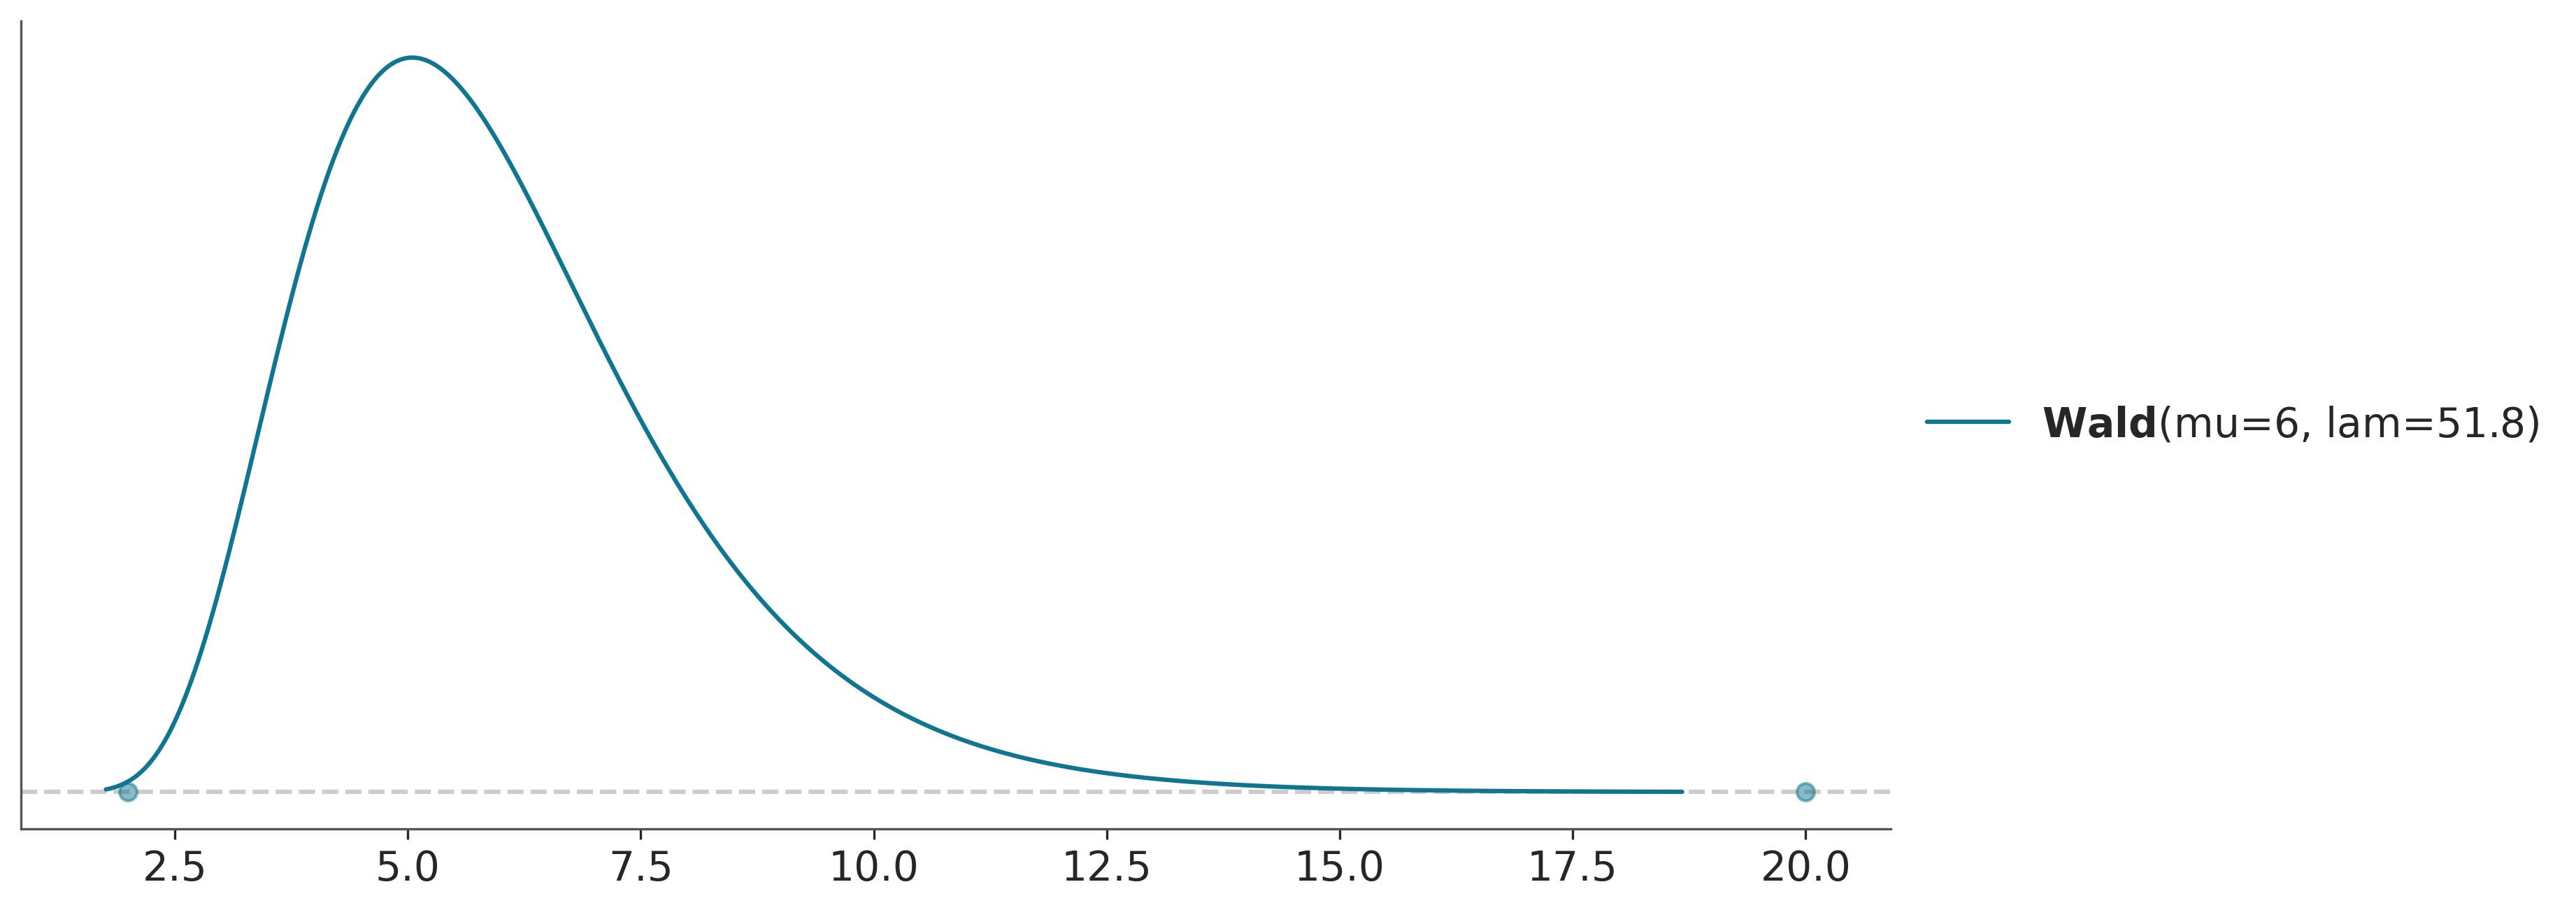

In [33]:
pz.maxent(pz.Wald(mu=6), lower=2, upper=20, mass=0.9)

#### 11)
Usá la siguiente función para explorar diversas combinaciones de priors y likelihoods. Enunciá las conclusiones que consideres más relevantes.

In [8]:
def a_posteriori_grilla(grilla=10, a=1, b=1, caras=6, tiradas=9):
    grid = np.linspace(0, 1, grilla)
    prior = pz.Beta(a, b).pdf(grid)
    likelihood = pz.Binomial(n=tiradas, p=grid).pdf(caras)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    _, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 4))
    ax[0].set_title('caras = {}\ntiradas = {}'.format(caras, tiradas))
    for i, (e, e_n) in enumerate(zip([prior, likelihood, posterior], ['a priori', 'likelihood', 'a posteriori'])):
        ax[i].set_yticks([])
        ax[i].plot(grid, e, 'o-', label=e_n)
        ax[i].legend(fontsize=14)


interact(a_posteriori_grilla, grilla=ipyw.IntSlider(min=2, max=100, step=1, value=15), a=ipyw.FloatSlider(min=1, max=7, step=1, value=1), b=ipyw.FloatSlider(
    min=1, max=7, step=1, value=1), caras=ipyw.IntSlider(min=0, max=20, step=1, value=6), tiradas=ipyw.IntSlider(min=0, max=20, step=1, value=9));

interactive(children=(IntSlider(value=15, description='grilla', min=2), FloatSlider(value=1.0, description='a'…

+ La distribución _a posteriori_ simpre queda entre la _prior_ y la _likelihood_, inclinandose hacia la más informativa.  
+ A más tiradas más se inclina hacia la _likelihood_, ya que a maypr número de tiradas tenemos mayor certeza de las observaciones.    
+ Cuando usamos un prior no informativo (uniforme) la _posterior_ y la _likelihood_ tienen la misma forma, lo que tiene sentido por la formula de Bayes.  